# Imports

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Data Acquisition

In [46]:
df_target = pd.read_csv('/Users/noelkronenberg/Documents/GitHub/hub-visa/00_EDA/lucas_organic_carbon/target/lucas_organic_carbon_target.csv')
df_training = pd.read_csv('/Users/noelkronenberg/Documents/GitHub/hub-visa/00_EDA/lucas_organic_carbon/training_test/lucas_organic_carbon_training_and_test_data.csv')

df_combined = pd.merge(df_training, df_target, left_index=True, right_index=True)

In [47]:
df_combined

,500.0,500.5,501.0,501.5,502.0,502.5,503.0,503.5,504.0,504.5,...,2495.5,2496.0,2496.5,2497.0,2497.5,2498.0,2498.5,2499.0,2499.5,x
0,0.000276,0.000278,0.000280,0.000281,0.000283,0.000284,0.000286,0.000288,0.000289,0.000291,...,-0.000068,-0.000065,-0.000063,-0.000060,-0.000058,-0.000056,-0.000053,-5.061078e-05,-4.816587e-05,very_low
1,0.000351,0.000353,0.000355,0.000357,0.000358,0.000360,0.000362,0.000364,0.000366,0.000368,...,-0.000038,-0.000036,-0.000034,-0.000031,-0.000029,-0.000026,-0.000024,-2.168124e-05,-1.931380e-05,very_low
2,0.000330,0.000331,0.000333,0.000335,0.000337,0.000339,0.000341,0.000343,0.000344,0.000346,...,-0.000084,-0.000081,-0.000079,-0.000076,-0.000074,-0.000072,-0.000069,-6.679452e-05,-6.440287e-05,very_low
3,0.000300,0.000303,0.000305,0.000307,0.000309,0.000312,0.000314,0.000316,0.000318,0.000320,...,-0.000105,-0.000100,-0.000096,-0.000092,-0.000088,-0.000084,-0.000080,-7.568524e-05,-7.155962e-05,moderate
4,0.000388,0.000390,0.000391,0.000393,0.000395,0.000397,0.000399,0.000401,0.000403,0.000405,...,-0.000074,-0.000072,-0.000070,-0.000067,-0.000065,-0.000063,-0.000061,-5.870974e-05,-5.653841e-05,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9890,0.000457,0.000459,0.000461,0.000463,0.000466,0.000468,0.000470,0.000472,0.000474,0.000476,...,-0.000169,-0.000165,-0.000160,-0.000155,-0.000151,-0.000146,-0.000141,-1.368160e-04,-1.321985e-04,very_low
9891,0.000248,0.000250,0.000253,0.000255,0.000257,0.000259,0.000262,0.000264,0.000266,0.000268,...,-0.000068,-0.000065,-0.000062,-0.000059,-0.000056,-0.000054,-0.000051,-4.790701e-05,-4.510363e-05,very_low
9892,0.000390,0.000393,0.000396,0.000399,0.000402,0.000405,0.000408,0.000411,0.000414,0.000417,...,-0.000173,-0.000169,-0.000165,-0.000161,-0.000157,-0.000153,-0.000149,-1.453230e-04,-1.413482e-04,very_low
9893,0.000334,0.000334,0.000335,0.000336,0.000336,0.000337,0.000338,0.000338,0.000339,0.000340,...,-0.000012,-0.000011,-0.000009,-0.000007,-0.000006,-0.000004,-0.000003,-9.881578e-07,6.056967e-07,very_low


# Modelling

In [48]:
predictors = df_combined.columns[:-1]
target = df_combined.columns[-1]

In [49]:
X = df_combined[predictors]
y= df_combined[target]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Grid Search (CV)

### Training

In [59]:
rf_classifier = RandomForestClassifier(
    n_estimators = 100, 
    random_state = 42
)

In [69]:
param_grid = {
    'n_estimators': [10, 100, 250],
    'max_depth': [None, 10, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [70]:
grid_search = GridSearchCV(
    estimator = rf_classifier, 
    param_grid = param_grid, 
    cv = 3, 
    n_jobs = -1, 
    verbose = 2
)

In [71]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n

/opt/miniconda3/envs/default/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
243 fits failed out of a total of 729.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/default/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/default/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/miniconda3/envs/default/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_c

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 250]},
             verbose=2)

### Evaluation

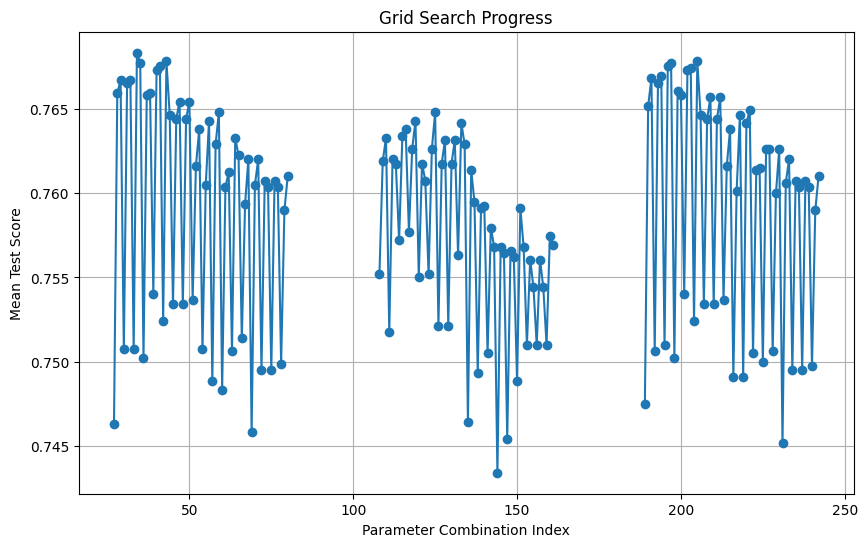

In [72]:
results = pd.DataFrame(grid_search.cv_results_)
mean_test_scores = results['mean_test_score']
params = results['params']

plt.figure(figsize=(10, 6))
plt.plot(mean_test_scores, marker='o')
plt.title('Grid Search Progress')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()

In [73]:
best_model = grid_search.best_estimator_

best_model_score = best_model.score(X_test, y_test)
cv_scores = cross_val_score(best_model, X_test, y_test, cv=5)

print("Best parameters found: ", best_model.get_params())
print("Performance of the best model on the test data:", best_model_score)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Best parameters found:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Performance of the best model on the test data: 0.7781707933299646
Cross-validation scores: [0.75757576 0.77777778 0.77272727 0.72979798 0.76202532]
Mean cross-validation score: 0.7599808208668968


## Random Search (CV)

### Training

In [ ]:
param_dist = {
    'n_estimators': randint(50,500),
    'max_depth': randint(1,20)
}

In [52]:
rf_classifier = RandomForestClassifier()

In [ ]:
rand_search = RandomizedSearchCV(
    rf_classifier, 
    param_distributions = param_dist, 
    n_iter = 5, 
    cv = 3
)

In [54]:
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30b3586b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30a8ce930>})

### Evaluation

In [55]:
best_model = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 384}


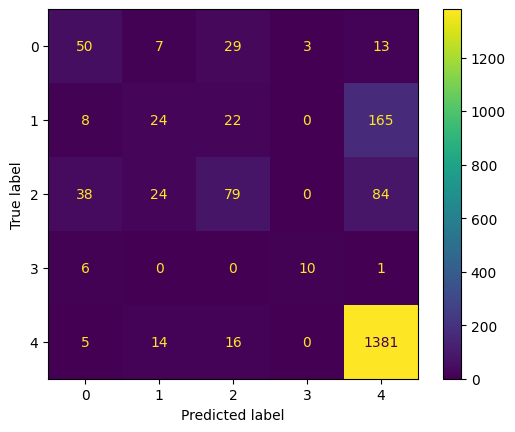

In [56]:
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [57]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7801920161697827
Precision: 0.5930933594249324
Recall: 0.5028828021263455


In [58]:
best_model_score = best_model.score(X_test, y_test)
cv_scores = cross_val_score(best_model, X_test, y_test, cv=5)

print("Performance of the best model on the test data:", best_model_score)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Performance of the best model on the test data: 0.7801920161697827
Cross-validation scores: [0.75505051 0.77525253 0.76262626 0.75252525 0.76202532]
Mean cross-validation score: 0.7614959723820484


# References

- https://www.datacamp.com/tutorial/random-forests-classifier-python